In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.stats as stats

In [9]:
df = pd.read_csv("anova_lab1.csv")
df

,length,call
0,0.6,info
1,1.1,info
2,1.0,info
3,1.9,info
4,3.8,info
5,1.6,info
6,0.4,info
7,0.6,info
8,2.2,info
9,12.3,info


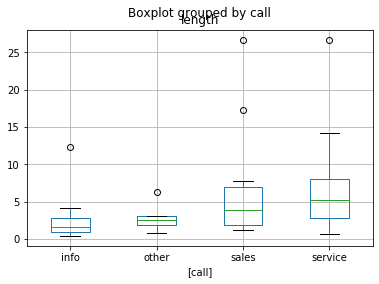

In [3]:
boxplot = df.boxplot(by = 'call') 
plt.show()

In [4]:
rp.summary_cont(df['length'].groupby(df['call']))

,N,Mean,SD,SE,95% Conf.,Interval
call,,,,,,
info,13,2.6077,3.1473,0.8729,0.7058,4.5096
other,7,2.7857,1.7827,0.6738,1.1370,4.4345
sales,17,5.8706,6.6210,1.6058,2.4664,9.2748
service,15,7.1933,6.7180,1.7346,3.4730,10.9137


In [5]:
stats.shapiro(df['length'])

(0.6967328786849976, 4.542465958934372e-09)

In [6]:
dfLog = df
dfLog['length'] = np.log(df['length'])

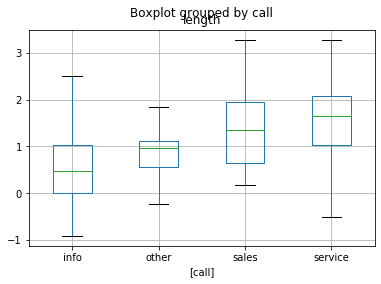

In [7]:
boxplot = dfLog.boxplot(by = 'call') 
plt.show()

In [8]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
model = ols('length ~ call', data = dfLog).fit() 
aov_table = sm.stats.anova_lm(model, typ = 2)
aov_table

,sum_sq,df,F,PR(>F)
call,9.423681,3.0,3.851057,0.015055
Residual,39.152601,48.0,NaN,NaN


In [12]:
import statsmodels.stats.multicomp as mc 
comp = mc.MultiComparison(dfLog['length'], dfLog['call']) 
post_hoc_res = comp.tukeyhsd() 
print(str(post_hoc_res._results_table))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower  upper  reject
----------------------------------------------------
  info   other   0.3274 0.8519 -0.7995 1.4543  False
  info   sales   0.8411 0.0683 -0.0445 1.7268  False
  info service   1.0671 0.0157  0.1562  1.978   True
 other   sales   0.5137 0.5789 -0.5658 1.5932  False
 other service   0.7397 0.2912 -0.3606   1.84  False
 sales service   0.2259 0.8891 -0.6256 1.0775  False
----------------------------------------------------


In [13]:
df = pd.read_csv("anova_lab2.csv")

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('effect ~ C(type) + C(parameter) + C(type):C(parameter)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(type),630.375,1.0,54.486194,7.559419e-07
C(parameter),39.250,2.0,1.696279,2.113919e-01
C(type):C(parameter),19.750,2.0,0.853541,4.424370e-01
Residual,208.250,18.0,NaN,NaN


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


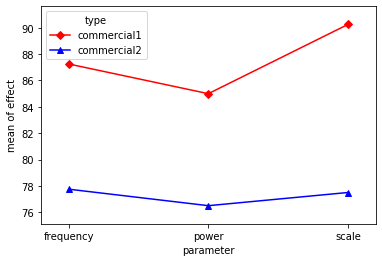

In [15]:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(df.parameter, df.type, df.effect, colors=['red', 'blue'], markers=['D', '^'])
fig.show()